# Proyecto Marketing Bancario
---
Intergantes:

| Nombre | apellido |
| ---- | ---- |
| Melany Odet | Castañeda Bazaldúa |
| Genesis Guadalupe | Ibarra Iturbe |
| silvestre | Hernandez Hernandez |
| Alan Aarón | Martinez Celedonio |



## Datos de la actividad

### Descripción de Variables del Dataset de Marketing Bancario

Este dataset contiene datos de una campaña de marketing bancario, donde se recopiló información sobre interacciones con clientes con el objetivo de predecir la efectividad de las campañas y mejorar las estrategias futuras. Los datos ofrecen una visión comprensiva sobre las características de los clientes y su respuesta a las campañas de telemarketing, permitiendo a los analistas explorar y descubrir patrones que pueden mejorar la efectividad de las futuras acciones de marketing. El análisis de este dataset ayudará a responder preguntas clave como la influencia del perfil demográfico y financiero del cliente en su disposición a suscribir nuevos servicios bancarios.

- **Edad**: Edad del cliente.
- **Trabajo**: Tipo de trabajo del cliente (ej. 'admin.', 'technician', 'services', etc.).
- **Estado_Civil**: Estado civil del cliente (ej. 'married', 'single', 'divorced').
- **Educacion**: Nivel educativo del cliente (ej. 'primary', 'secondary', 'tertiary').
- **Default**: Indica si el cliente tiene crédito en mora ('yes', 'no').
- **Balance**: Saldo anual promedio, en euros.
- **Vivienda**: Indica si el cliente tiene un préstamo de vivienda ('yes', 'no').
- **Prestamo**: Indica si el cliente tiene un préstamo personal ('yes', 'no').
- **Contacto**: Tipo de comunicación de contacto utilizada (ej. 'telephone', 'cellular', 'unknown').
- **Dia**: Día del mes en que se realizó el último contacto.
- **Mes**: Mes del año en que se realizó el último contacto (ej. 'jan', 'feb', 'mar', etc.).
- **Duracion**: Duración del último contacto, en segundos.
- **Campania**: Número de contactos realizados durante esta campaña y para este cliente.
- **Pdias**: Número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior.
- **Anterior**: Número de contactos realizados antes de esta campaña y para este cliente.
- **Resultado_Anterior**: Resultado de la campaña de marketing anterior (ej. 'failure', 'nonexistent', 'success').
- **Deposito**: Indica si el cliente ha suscrito un depósito a plazo ('yes', 'no').

Importacion de librerias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

## Criterios a cumplir

### Datos cargados y Visualizados Correctamente

In [24]:
# Código
# 1. Carga de datos
print("1. Carga de datos")
df = pd.read_csv('Marketing.csv')
print(f"Dimensiones del DataFrame: {df.shape}")
print("\nPrimeras 5 filas del DataFrame:")
print(df.head())

1. Carga de datos
Dimensiones del DataFrame: (11162, 17)

Primeras 5 filas del DataFrame:
   Edad     Trabajo Estado_Civil  Educacion Default  Balance Vivienda  \
0    59      admin.      married  secondary      no     2343      yes   
1    56      admin.      married  secondary      no       45       no   
2    41  technician      married  secondary      no     1270      yes   
3    55    services      married  secondary      no     2476      yes   
4    54      admin.      married   tertiary      no      184       no   

  Prestamo Contacto  Dia  Mes  Duracion  Campania  Pdias  Anterior  \
0       no  unknown    5  may      1042         1     -1         0   
1       no  unknown    5  may      1467         1     -1         0   
2       no  unknown    5  may      1389         1     -1         0   
3       no  unknown    5  may       579         1     -1         0   
4       no  unknown    5  may       673         2     -1         0   

  Resultado_Anterior Deposito  
0            unkno

### Exploración de Inicial de Datos

In [25]:
# Código
# 2. Exploración inicial de datos
print("\n2. Exploración inicial de datos")
print("\nInformación general del DataFrame:")
print(df.info())



2. Exploración inicial de datos

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Edad                11162 non-null  int64 
 1   Trabajo             11162 non-null  object
 2   Estado_Civil        11162 non-null  object
 3   Educacion           11162 non-null  object
 4   Default             11162 non-null  object
 5   Balance             11162 non-null  int64 
 6   Vivienda            11162 non-null  object
 7   Prestamo            11162 non-null  object
 8   Contacto            11162 non-null  object
 9   Dia                 11162 non-null  int64 
 10  Mes                 11162 non-null  object
 11  Duracion            11162 non-null  int64 
 12  Campania            11162 non-null  int64 
 13  Pdias               11162 non-null  int64 
 14  Anterior            11162 non-null  int64 
 15  R

In [26]:
print("\nEstadísticas descriptivas:")
print(df.describe().T)


Estadísticas descriptivas:
            count         mean          std     min    25%    50%      75%  \
Edad      11162.0    41.231948    11.913369    18.0   32.0   39.0    49.00   
Balance   11162.0  1528.538524  3225.413326 -6847.0  122.0  550.0  1708.00   
Dia       11162.0    15.658036     8.420740     1.0    8.0   15.0    22.00   
Duracion  11162.0   371.993818   347.128386     2.0  138.0  255.0   496.00   
Campania  11162.0     2.508421     2.722077     1.0    1.0    2.0     3.00   
Pdias     11162.0    51.330407   108.758282    -1.0   -1.0   -1.0    20.75   
Anterior  11162.0     0.832557     2.292007     0.0    0.0    0.0     1.00   

              max  
Edad         95.0  
Balance   81204.0  
Dia          31.0  
Duracion   3881.0  
Campania     63.0  
Pdias       854.0  
Anterior     58.0  


In [27]:
print("\nValores únicos en cada columna:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


Valores únicos en cada columna:
Edad: 76
Trabajo: 12
Estado_Civil: 3
Educacion: 4
Default: 2
Balance: 3805
Vivienda: 2
Prestamo: 2
Contacto: 3
Dia: 31
Mes: 12
Duracion: 1428
Campania: 36
Pdias: 472
Anterior: 34
Resultado_Anterior: 4
Deposito: 2


In [28]:
print("\nVerificación de valores nulos:")
print(df.isnull().sum())


Verificación de valores nulos:
Edad                  0
Trabajo               0
Estado_Civil          0
Educacion             0
Default               0
Balance               0
Vivienda              0
Prestamo              0
Contacto              0
Dia                   0
Mes                   0
Duracion              0
Campania              0
Pdias                 0
Anterior              0
Resultado_Anterior    0
Deposito              0
dtype: int64


### Limpieza de datos

Limpieza de datos (parte 1)

In [29]:
# Código
# 3. Limpieza de datos
print("\n3. Limpieza de datos")

# Convertir columnas a tipos de datos apropiados
numeric_columns = ['Edad', 'Balance', 'Dia', 'Duracion', 'Campania', 'Pdias']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')



3. Limpieza de datos


In [30]:
# Convertir columnas categóricas binarias a booleano
binary_columns = ['Default', 'Vivienda', 'Prestamo', 'Deposito']
for col in binary_columns:
    df[col] = df[col].map({'yes': True, 'no': False})

In [31]:

# Manejar valores desconocidos en 'Educacion'
df['Educacion'] = df['Educacion'].replace('unknown', 'No especificado')

In [32]:
# Reemplazar -1 en 'Pdias' por 0
df['Pdias'] = df['Pdias'].replace(-1, 0)

Limpieza de datos (Parte 2 - tratamiento de outliers)

In [33]:
# Tratamiento de outliers usando IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

df = remove_outliers(df, 'Balance')
df = remove_outliers(df, 'Duracion')

print("Datos después de la limpieza:")
print(df.describe().T)

Datos después de la limpieza:
           count        mean         std     min    25%    50%     75%     max
Edad      9513.0   40.929044   11.805862    18.0   32.0   38.0    49.0    95.0
Balance   9513.0  807.524440  998.439666 -2049.0   94.0  437.0  1224.0  4087.0
Dia       9513.0   15.608325    8.468083     1.0    8.0   15.0    22.0    31.0
Duracion  9513.0  307.122569  233.360599     2.0  131.0  237.0   423.0  1018.0
Campania  9513.0    2.503732    2.724799     1.0    1.0    2.0     3.0    43.0
Pdias     9513.0   53.238831  110.192279     0.0    0.0    0.0    50.0   854.0
Anterior  9513.0    0.838747    2.254251     0.0    0.0    0.0     1.0    58.0


### Transformación de Variables

In [34]:
# Código
# 4. Transformación de variables
print("\n4. Transformación de variables")

# Codificar variables categóricas
categorical_columns = ['Trabajo', 'Estado_Civil', 'Educacion', 'Contacto', 'Mes', 'Resultado_Anterior']
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))



4. Transformación de variables


In [35]:
# Normalizar 'Balance' y 'Duracion'
scaler = StandardScaler()
df[['Balance', 'Duracion']] = scaler.fit_transform(df[['Balance', 'Duracion']])

### Visualizaciones


5. Visualizaciones


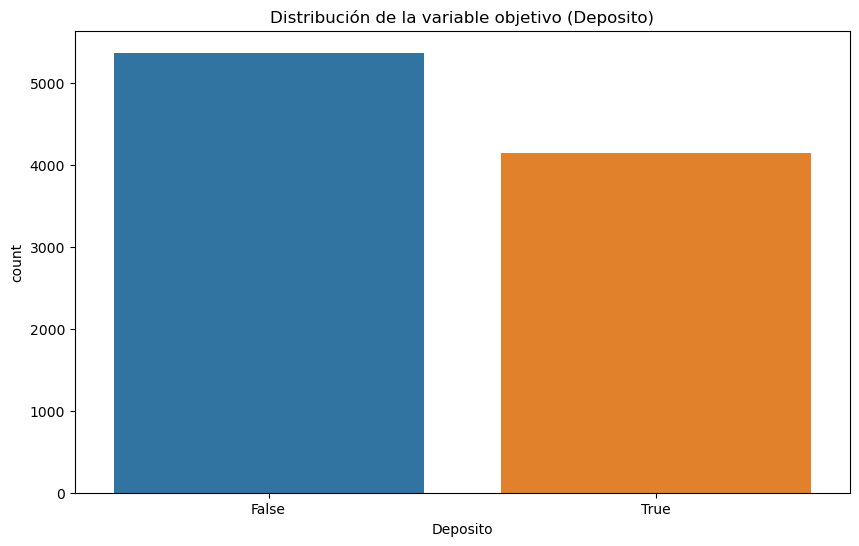

In [36]:
# Código
# 5. Visualizaciones
print("\n5. Visualizaciones")

# Distribución de la variable objetivo
plt.figure(figsize=(10,6))
sns.countplot(x='Deposito', data=df)
plt.title('Distribución de la variable objetivo (Deposito)')
plt.show()

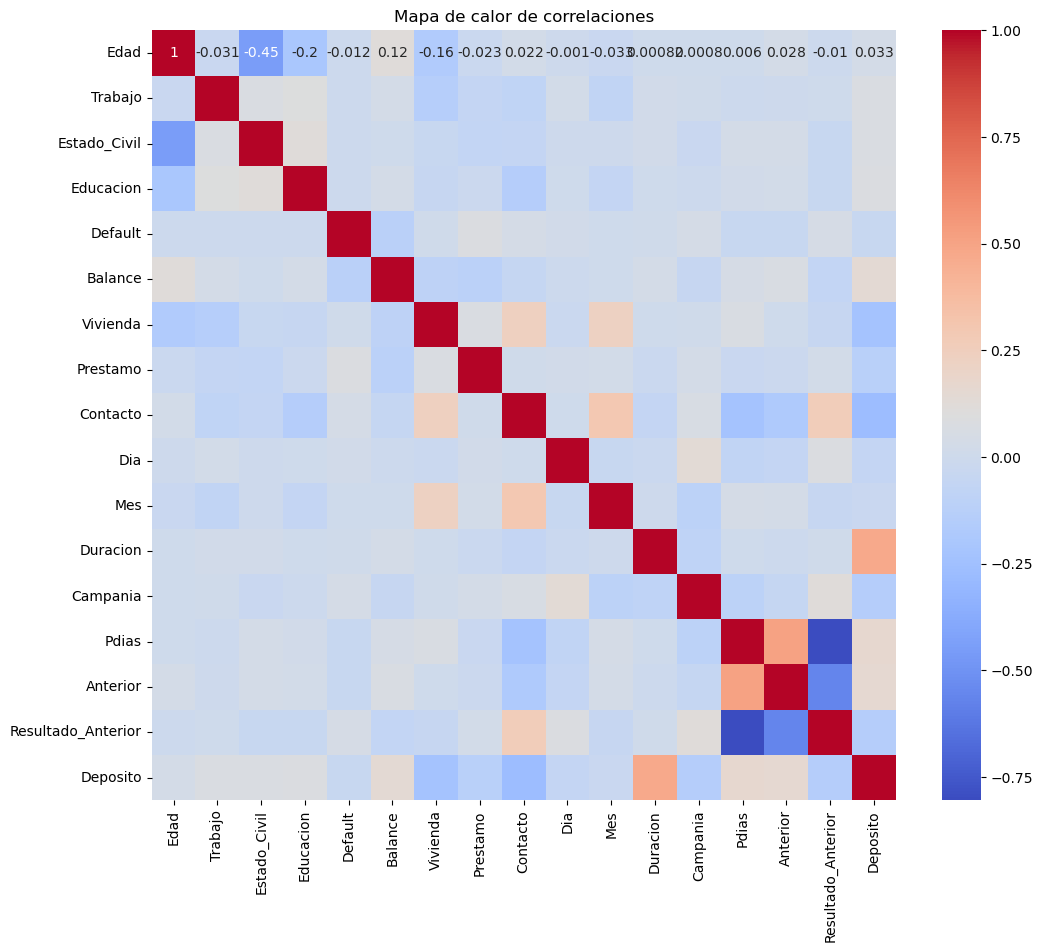

In [37]:
# Correlación entre variables numéricas
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()


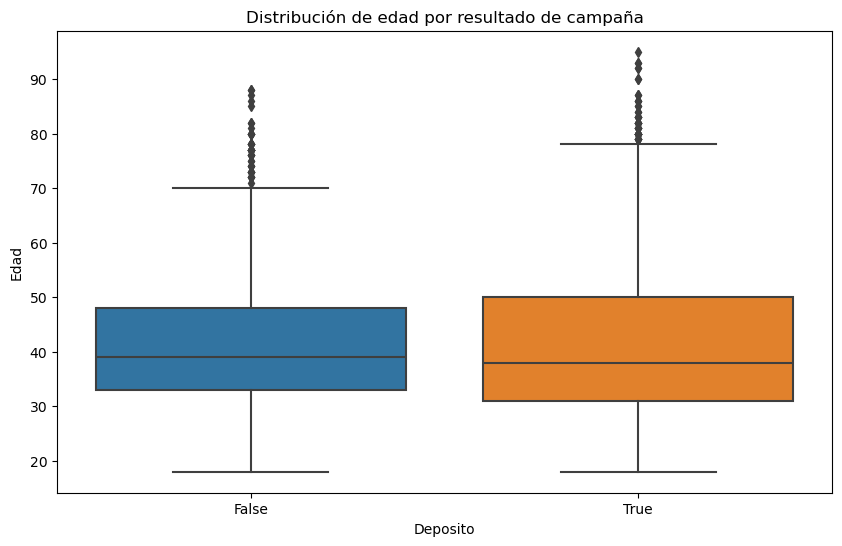

In [38]:
# Distribución de edad por resultado de campaña
plt.figure(figsize=(10,6))
sns.boxplot(x='Deposito', y='Edad', data=df)
plt.title('Distribución de edad por resultado de campaña')
plt.show()


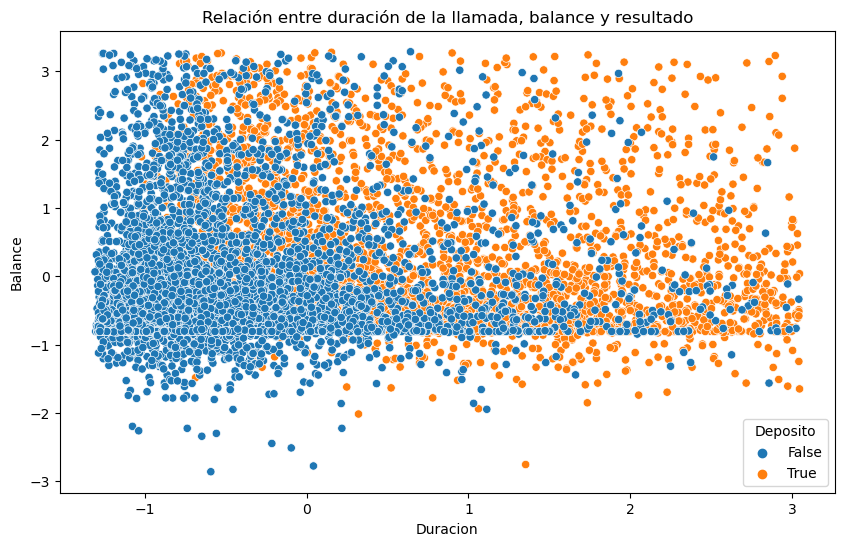

In [39]:
# Relación entre duración de la llamada y resultado
plt.figure(figsize=(10,6))
sns.scatterplot(x='Duracion', y='Balance', hue='Deposito', data=df)
plt.title('Relación entre duración de la llamada, balance y resultado')
plt.show()

Guardar datos limpios

In [40]:
# Dividir en características (X) y variable objetivo (y)
X = df.drop('Deposito', axis=1)
y = df['Deposito']

# Guardar el DataFrame limpio
X.to_csv('./marketing_clean_X.csv', index=False)
y.to_csv('./marketing_clean_y.csv', index=False)

print("\nDatos limpios y transformados guardados en 'marketing_clean_X.csv' y 'marketing_clean_y.csv'")


Datos limpios y transformados guardados en 'marketing_clean_X.csv' y 'marketing_clean_y.csv'


### Correlaciones y Analisis Estadístico Básico

In [ ]:
# Código

### Selección y Creación de Nuevas Caracteristicas

In [ ]:
# Código

### Preparación de Datasets para Modelado

In [ ]:
# Código

### Selección de Algoritmos Adecuados

In [ ]:
# Código

### Implementación Correcta de Modelos

In [ ]:
# Código

### Evaluación del Modelo

In [ ]:
# Código

### Interpretación de Resultados

In [ ]:
# Código

### Conclusiones y recomendaciones

In [ ]:
# Código